In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import uproot
import math
from scipy.interpolate import interp1d
from IPython.core.pylabtools import figsize # import figsize
#figsize(12.5, 4) # 设置 figsize
plt.rcParams['savefig.dpi'] = 200 #图片像素
plt.rcParams['figure.dpi'] = 400 #分辨率
from scipy.optimize import curve_fit

In [43]:
B8Band = uproot.open("../build/testPandaX4T.root")["8B_Band"]
ERBand = uproot.open("../build/testPandaX4T.root")["ER_Band"]
NRBand = uproot.open("../build/testPandaX4T.root")["NR_Band"]

B8 = B8Band.values()
ER = ERBand.values()
NR = NRBand.values()
B8 = B8.T
ER = ER.T
NR = NR.T

B8.shape
print(len(B8))



500


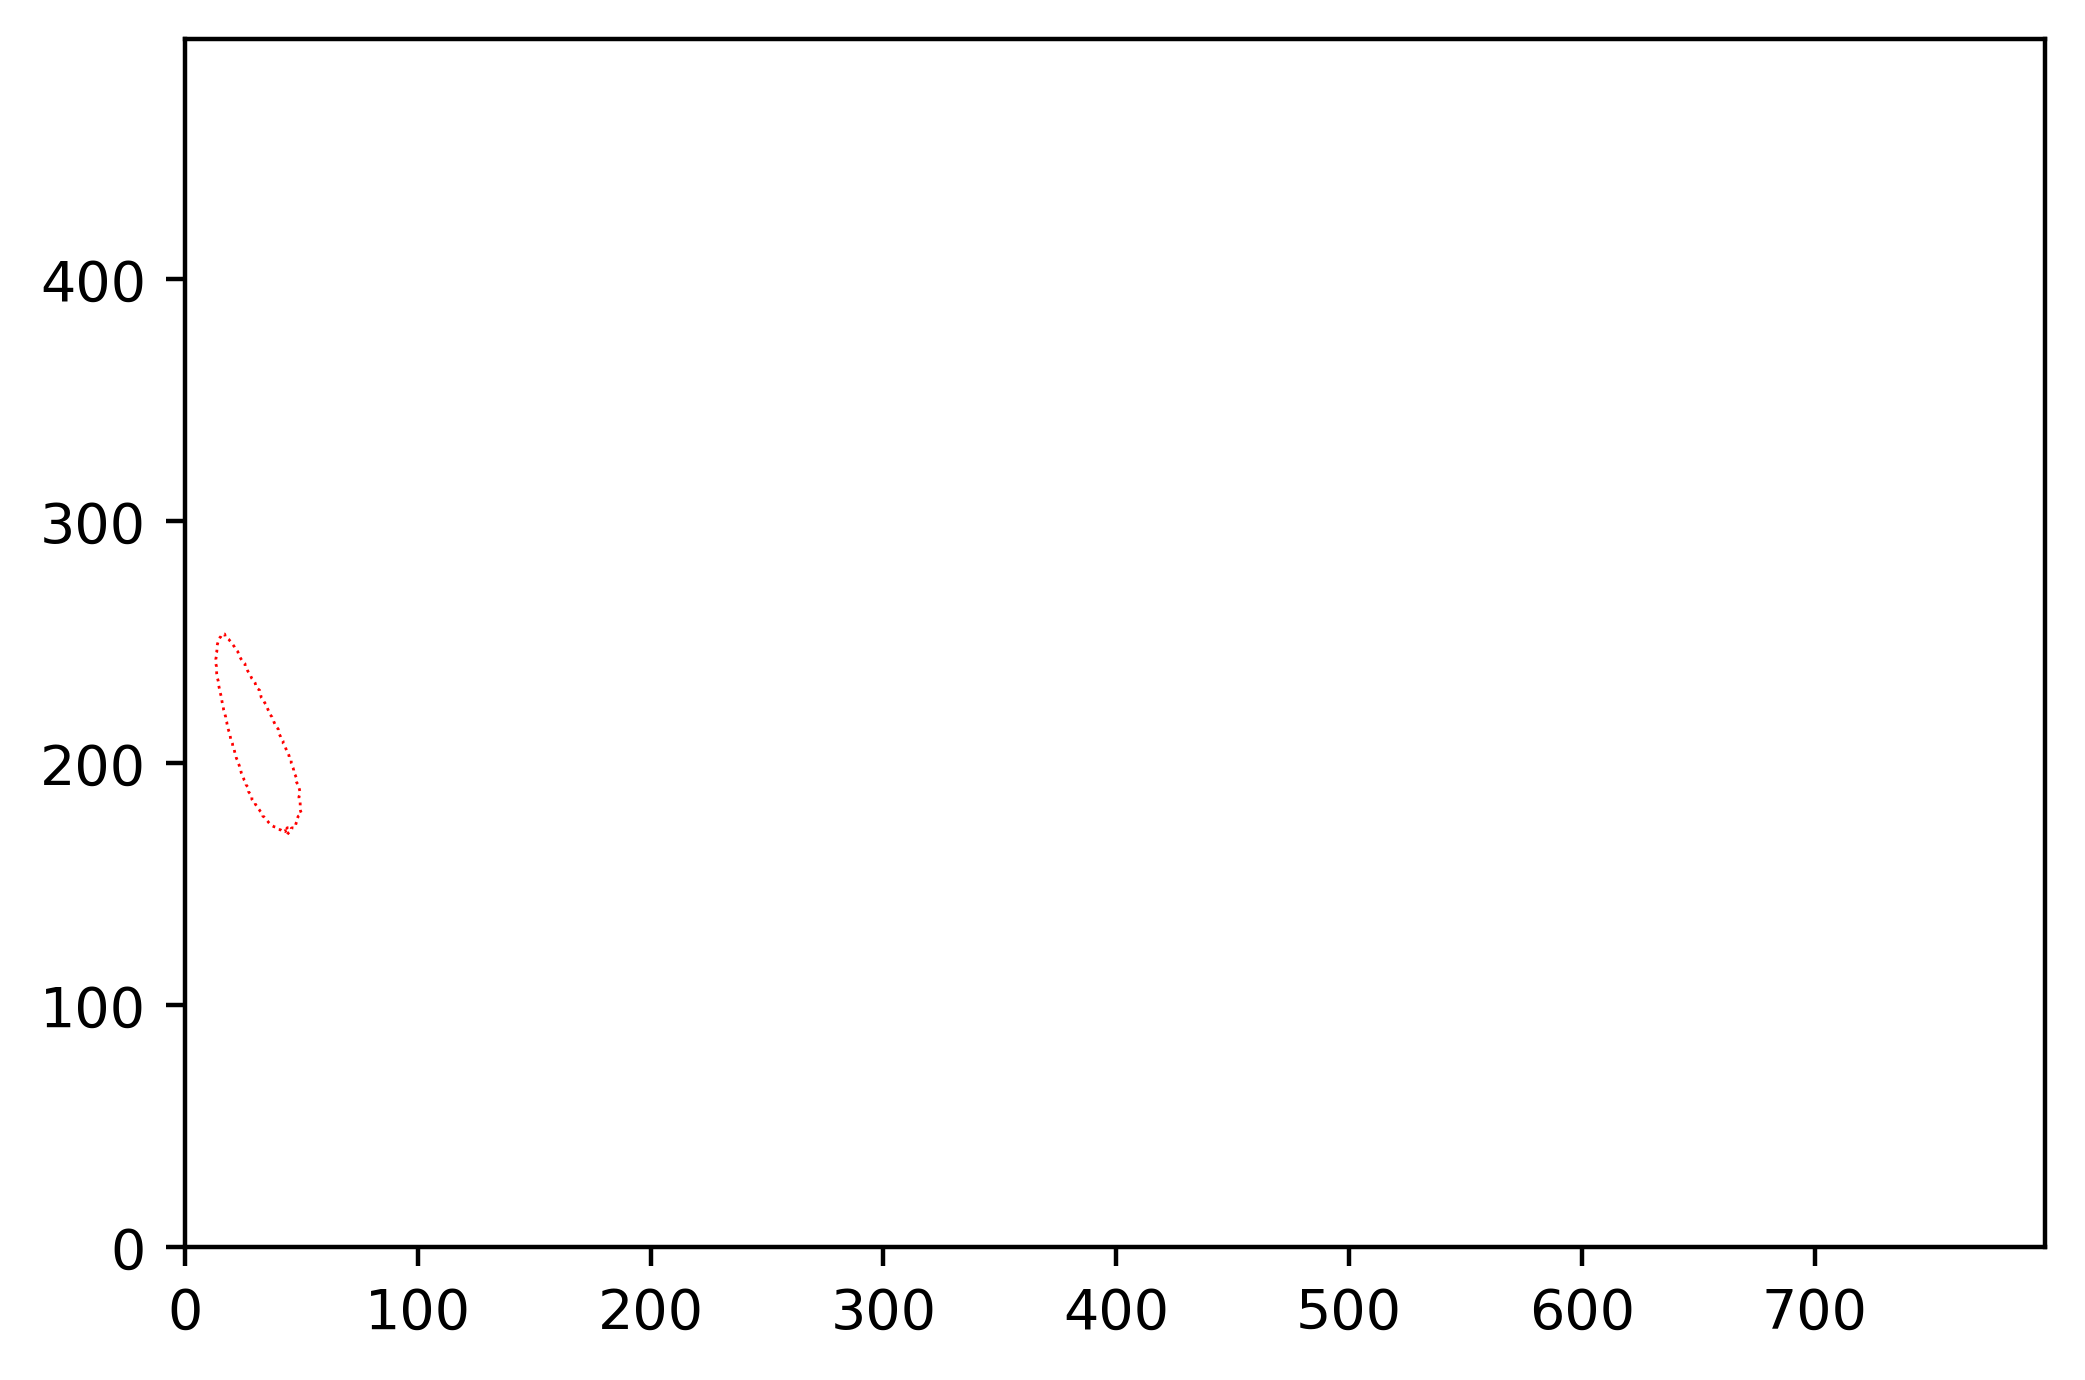

In [19]:
hist0 = np.reshape(B8, np.prod(B8.shape))
hist0 = np.sort(hist0)
cums = np.cumsum(hist0) / np.sum(hist0)
f = interp1d(cums, hist0)
levels = [f(0.32)]# contour
Xs, Ys = np.meshgrid(
    range(800),
    range(500)
)
contours = plt.contour(
    Xs,
    Ys,
    B8,
    levels,
    colors=('r'),
    linewidths=0.5,
    linestyles='dotted',
    # label='Migdal ER 95% contour'
)



In [25]:
p = contours.collections[0].get_paths()[0]
v = p.vertices
print(v)

[[ 44.         170.47634201]
 [ 44.31419479 171.        ]
 [ 45.         171.44532806]
 [ 45.67793237 172.        ]
 [ 45.64516343 173.        ]
 [ 46.         173.19415586]
 [ 47.         173.11000668]
 [ 47.44499666 174.        ]
 [ 47.67511595 175.        ]
 [ 48.         175.75806279]
 [ 48.31106213 176.        ]
 [ 48.18672576 177.        ]
 [ 48.66730955 178.        ]
 [ 49.         178.21432943]
 [ 50.         178.89987351]
 [ 50.06167792 179.        ]
 [ 50.         179.29652845]
 [ 49.66744981 180.        ]
 [ 49.49261439 181.        ]
 [ 49.45571015 182.        ]
 [ 49.48660576 183.        ]
 [ 49.41404734 184.        ]
 [ 49.         184.99120423]
 [ 48.99754017 185.        ]
 [ 48.93087626 186.        ]
 [ 49.         186.17972173]
 [ 49.31549164 187.        ]
 [ 49.36094243 188.        ]
 [ 49.17442247 189.        ]
 [ 49.         189.57969822]
 [ 48.83574413 190.        ]
 [ 48.65499682 191.        ]
 [ 48.         191.86628612]
 [ 47.93259951 192.        ]
 [ 47.55340548

In [37]:
x = v[:,0]
y = v[:,1]
#np.reshape(x,np.prod(x.shape))
#np.reshape(y,np.prod(y.shape))
#x.tolist()
#y.tolist()

xmin = min(x)
xmax = max(x)
xMinIndex = np.where(x == xmin)[0][0]
xMaxIndex = np.where(x == xmax)[0][0]

xPointsDown = []
xPointsUpper = []
yPointsDown = []
yPointsUpper = []

##get points down
for i in range(xMinIndex,len(x)):
    xPointsDown.append(x[i])
    yPointsDown.append(y[i])
for i in range(xMaxIndex):
    xPointsDown.append(x[i])
    yPointsDown.append(y[i])

##get points up
for i in range(xMaxIndex,xMinIndex):
    xPointsUpper.append(x[i])
    yPointsUpper.append(y[i])
   




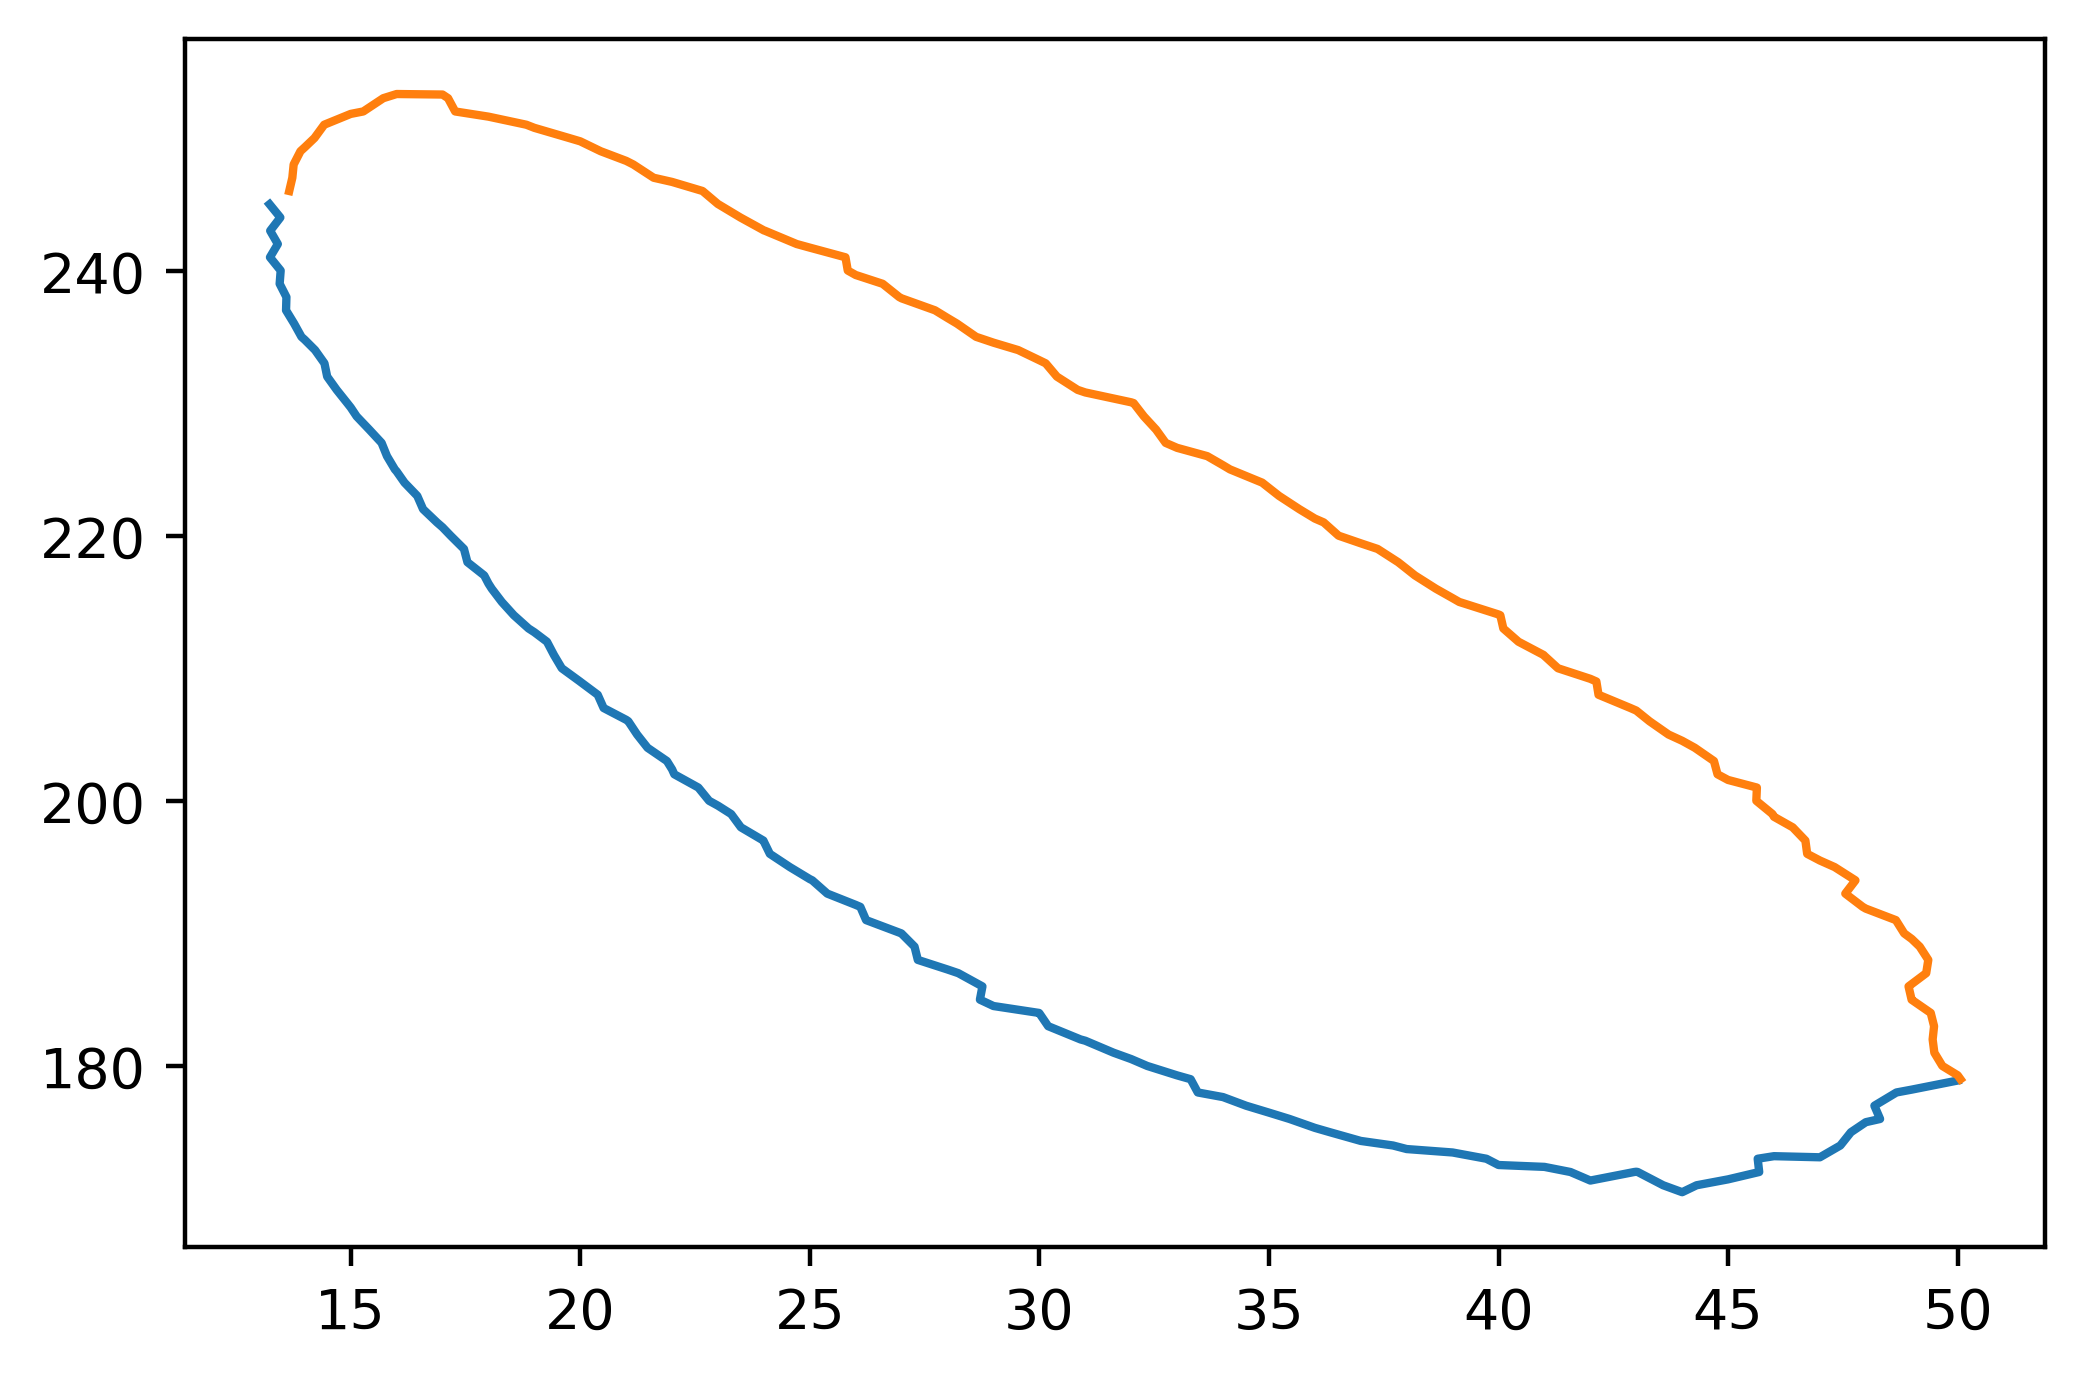

In [40]:
plt.plot(xPointsDown,yPointsDown)
plt.plot(xPointsUpper,yPointsUpper)

In [44]:
fDown = interp1d(xPointsDown, yPointsDown,fill_value="extrapolate")
fUpper = interp1d(xPointsUpper, yPointsUpper,fill_value="extrapolate")

EREvents = 0
NREvents = 0

for i in range(len(B8)):
    for j in range(len(B8[0])):
        if i >= fDown(j) and i <= fUpper(j):
            EREvents += ER[i,j]
            NREvents += NR[i,j]  

In [45]:
print(EREvents,NREvents)

15.0 221208.0
